In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv('family_data.csv')
data.head()

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,68,4,26,3,45,80,61,89,6,31,6
1,1,66,17,82,4,29,52,46,77,75,60,2
2,2,89,23,5,27,1,24,53,11,9,17,2
3,3,66,80,35,59,4,96,87,94,1,33,3
4,4,29,52,24,33,27,2,45,20,12,21,3


In [3]:
data.shape

(6000, 12)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [8]:
data['n_people'].describe()

count    6000.000000
mean        4.206333
std         1.545582
min         2.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         8.000000
Name: n_people, dtype: float64

(array([ 866., 1169.,    0., 1769.,    0., 1021.,  603.,    0.,  376.,
         196.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <a list of 10 Patch objects>)

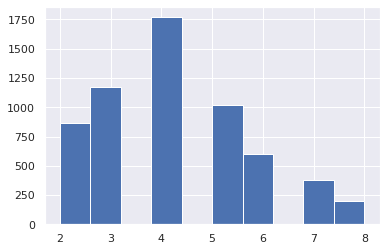

In [7]:
plt.hist(data['n_people'])

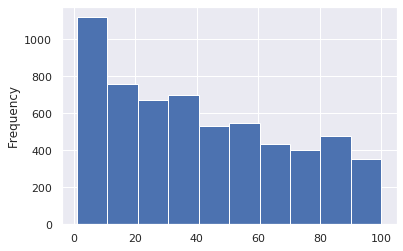

In [22]:
data['choice_0'].plot(kind='hist')

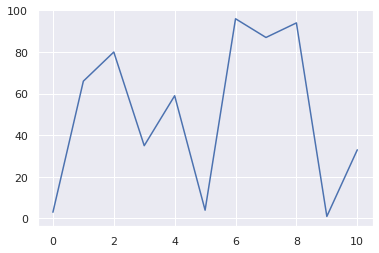

In [28]:
plt.plot(data.drop('n_people', axis=1).values[3])

In [29]:
data.head()

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,68,4,26,3,45,80,61,89,6,31,6
1,1,66,17,82,4,29,52,46,77,75,60,2
2,2,89,23,5,27,1,24,53,11,9,17,2
3,3,66,80,35,59,4,96,87,94,1,33,3
4,4,29,52,24,33,27,2,45,20,12,21,3


In [47]:
def family_gift(data, date, index):
    fees_forall = [0, 50, 50, 100, 200, 200, 300, 300, 400, 500, 500]
    fees_foreach = [0, 0, 9, 9, 9, 18, 18, 36, 36, 235, 434]
    
    num = data.loc[index, 'n_people']
    for i in range(10):
        if date == data.loc[index, f'choice_{i}']:
            return fees_forall[i] + fees_foreach[i] * num
    return fees_forall[10] + fees_foreach[10] * num

In [48]:
def penalty(dist):
    res = 0
    for d in range(100):
        first = (dist[d] - 125) / 400
        s = 0
        for j in range(1, 6):
            ind = min(99, d + j)
            s += dist[d] ** (0.5 + abs(dist[d] - dist[ind]) / 50) / j / j
        res += s * first
    return res

In [37]:
def evaluate(dist, data, res):
    base = sum([family_gift(data, res[i], i) for i in range(6000)])
    return base + penalty(dist)

In [44]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,family_id,assigned_day
0,0,100
1,1,99
2,2,98
3,3,97
4,4,96


In [45]:
sample['family_id'].describe()

count    6000.000000
mean     2999.500000
std      1732.195139
min         0.000000
25%      1499.750000
50%      2999.500000
75%      4499.250000
max      5999.000000
Name: family_id, dtype: float64

In [48]:
base = sum([family_gift(sample['assigned_day'][i], i) for i in range(6000)])

In [50]:
from collections import Counter

In [51]:
cnt = Counter(sample['assigned_day'].apply(lambda x: x - 1))

In [55]:
bla = sample['assigned_day'].apply(lambda x: x - 1)

In [57]:
dist = [0] * 100
for i in range(6000):
    dist[bla[i]] += data.loc[i, 'n_people']

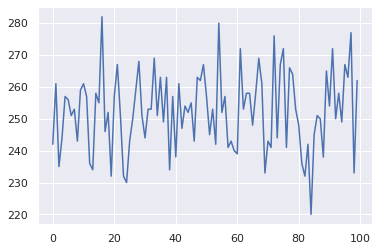

In [64]:
plt.plot(dist)

In [65]:
baseres = base + penalty(dist)

In [66]:
baseres

12824478.24884938

In [31]:
import random

def sample(data):
    dist = [0] * 100
    res = [-1] * 6000
    fams = list(range(6000))
    random.shuffle(fams)
    ind = 0
    cur = 0
    while ind < 100:
        res[fams[cur]] = ind
        dist[ind] += data.loc[fams[cur], 'n_people']
        if dist[ind] >= 125:
            ind += 1
        cur += 1       
    for family in range(cur, 6000):
        ok = False
        while not ok:
            ind = random.randint(0, 99)
            if dist[ind] + data.loc[fams[family], 'n_people'] > 300:
                continue
            dist[ind] += data.loc[fams[family], 'n_people']
            res[fams[family]] = ind
            ok = True
    return res, dist 

In [38]:
res, dist = sample(data)

(array([585., 573., 621., 597., 583., 620., 560., 605., 634., 622.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <a list of 10 Patch objects>)

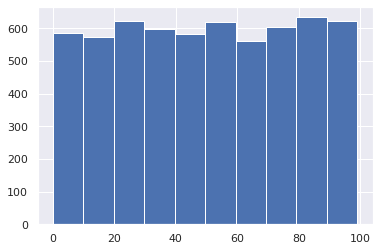

In [39]:
plt.hist(res)

In [52]:
def create_population(data, pop_size=100):
    population = []
    for i in range(pop_size):
        res, dist = sample(data)
        population.append((res, dist, evaluate(dist, data, res)))
        if not i % 10:
            print(f'{i + 1} распределение создано.')
    return population

In [53]:
pop = create_population(data)

1 распределение создано.
11 распределение создано.
21 распределение создано.
31 распределение создано.
41 распределение создано.
51 распределение создано.
61 распределение создано.
71 распределение создано.
81 распределение создано.
91 распределение создано.


In [54]:
vals = [el[2] for el in pop]

In [56]:
min(vals)

12824982.751378223